In [1]:
from astropy.table import Table
import matplotlib.pyplot as pl
import os
import numpy as np
from astropy.io import fits
# from astropy.wcs import wcs
import subprocess

In [2]:
region="off"
filt="f814w"

# autoset catalog path based on user
if os.environ['USER'] =='remy':
    workdir="/Users/remy/cv/magellanic/n159/"
    dolbin="/Users/remy/cv/magellanic/dolphot/dolphot2.0/bin/"
    
os.chdir(workdir+region+"/"+filt+"/")

if filt=="f125w" or filt=="f160w":
    kind="flt"  
    camera="wfc3"
else:
    # this is of course particular to this project that we did UVO with ACS and IR with WFC3
    kind="flc"
    camera="acs"
    
catfile = region+"_"+filt+"_f814ref"
cat=Table.read(catfile,format="ascii")
print(len(cat),cat[0:5])

422058 col1 col2   col3    col4  col5  col6 ... col124 col125 col126 col127 col128
---- ---- ------- ------- ---- ----- ... ------ ------ ------ ------ ------
   0    1   869.2 4000.29  0.0 469.1 ...  337.7 -0.468  0.371  0.029     12
   0    1   321.9   607.5  0.0 453.5 ...    0.0    0.0    0.0    0.0      9
   0    1 2556.54 3738.81  0.0 424.4 ...    0.0    0.0    0.0    0.0     12
   0    1 3695.74 2257.78  0.0 345.0 ...    0.0    0.0    0.0    0.0      9
   0    1 1372.33  4300.5  0.0 261.5 ...    0.0    0.0    0.0    0.0     12


In [3]:
# column definitions
mag = 'col16'
dmag= 'col18'
snr = 'col6'
shp = 'col7'
rnd = 'col8'
x   = 'col3'
y   = 'col4'
otype = 'col11'
crd = 'col10'

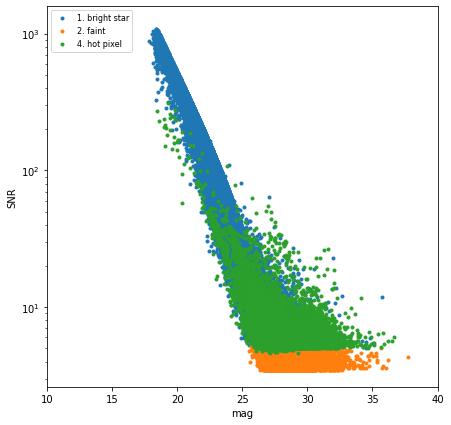

In [4]:
# basic SNR figure 
pl.figure(figsize=[7,7])
oname=['bright star','faint','elongated','hot pixel','extended']
for i in np.unique(cat[otype]):
    z=np.where(cat[otype]==i)[0]
    pl.plot(cat[mag][z],cat[snr][z],'.',label=("%i. "%i)+oname[i-1])
pl.xlabel("mag"),pl.ylabel("SNR")
pl.xlim(10,40)
pl.yscale("log")
pl.legend(loc="best",prop={"size":8})

f814w_gridto555w.fits


/Users/remy/opt/miniconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log10
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'hot pixels')

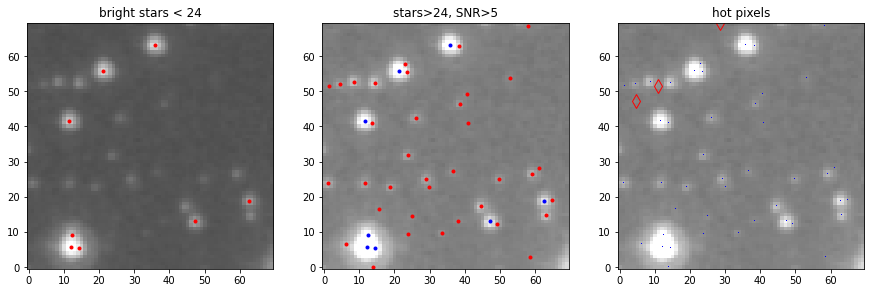

In [5]:
# get reference file 
reffile = subprocess.getoutput('grep img_file dolparms_'+filt+".multi.txt").split()[-1]+".fits"
print(reffile)

refhdu=fits.open(reffile)[0]
# mywcs = wcs.WCS(refhdu.header)

# overplot findings on reference image

pl.figure(figsize=(15,10))
img=np.log10(refhdu.data)
z=np.where(refhdu.data<=0)
img[z]=-5

# this window lower left corner and size can be moved around
llc=[730,600]
d=70

maglim=24

lra=[-2,0]
pl.subplot(131)
pl.imshow(img[llc[1]:llc[1]+d,llc[0]:llc[0]+d],vmin=lra[0],vmax=lra[1]+1,cmap="gray",origin="lower")
z1=np.where( (cat[x]>llc[0])*(cat[x]<llc[0]+d)*(cat[y]>llc[1])*(cat[y]<llc[1]+d)*(cat[otype]==1)*(cat[mag]<maglim) )[0]
pl.plot(cat[x][z1]-llc[0]-0.5,cat[y][z1]-llc[1]-0.5,'r.')
pl.title("bright stars < %i"%maglim)

pl.subplot(132)
pl.imshow(img[llc[1]:llc[1]+d,llc[0]:llc[0]+d],vmin=lra[0],vmax=lra[1],cmap="gray",origin="lower")
pl.plot(cat[x][z1]-llc[0]-0.5,cat[y][z1]-llc[1]-0.5,'b.')
# seems there are no faint stars <25 in this region
# z=np.where( (x>llc[0])*(x<llc[0]+d)*(y>llc[1])*(y<llc[1]+d)*(otype==2)*(mag<maglim) )[0]
z2=np.where( (cat[x]>llc[0])*(cat[x]<llc[0]+d)*(cat[y]>llc[1])*(cat[y]<llc[1]+d)*(cat[otype]!=4)*
            (cat[mag]>maglim)*(cat[snr]>5) )[0]
pl.plot(cat[x][z2]-llc[0]-0.5,cat[y][z2]-llc[1]-0.5,'r.')
pl.title("stars>%i, SNR>5"%maglim)

pl.subplot(133)
pl.imshow(img[llc[1]:llc[1]+d,llc[0]:llc[0]+d],vmin=lra[0],vmax=lra[1],cmap="gray",origin="lower")
pl.plot(cat[x][z1]-llc[0]-0.5,cat[y][z1]-llc[1]-0.5,'b,')
pl.plot(cat[x][z2]-llc[0]-0.5,cat[y][z2]-llc[1]-0.5,'b,')
z=np.where( (cat[x]>llc[0])*(cat[x]<llc[0]+d)*(cat[y]>llc[1])*(cat[y]<llc[1]+d)*(cat[otype]==4) )[0]
pl.plot(cat[x][z]-llc[0]-0.5,cat[y][z]-llc[1]-0.5,'rd',mfc="none",markersize=10)
pl.title("hot pixels")

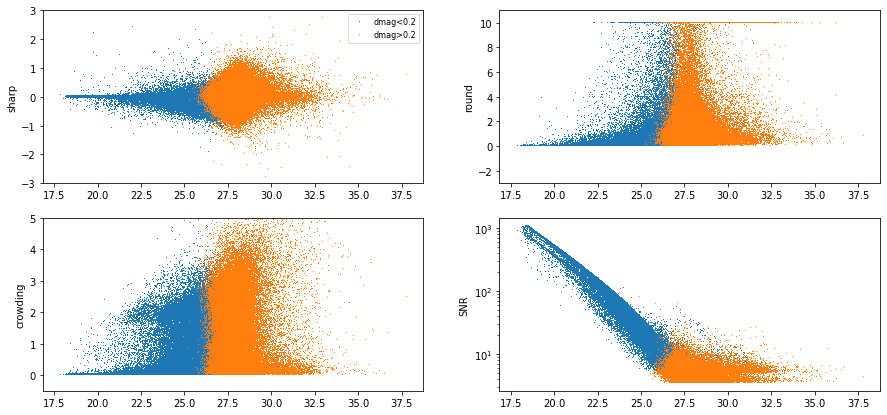

In [6]:
# more quality checks
pl.figure(figsize=(15,7))
pl.subplot(221)
z1=np.where((cat[mag]<90)*(cat[dmag]<0.2))[0]
pl.plot(cat[mag][z1],cat[shp][z1],',',label="dmag<0.2")
z=np.where((cat[mag]<90)*(cat[dmag]>=0.2))[0]
pl.plot(cat[mag][z],cat[shp][z],',',label="dmag>0.2")
pl.legend(loc="best",prop={"size":8})
pl.ylabel("sharp")
pl.ylim(-3,3)

pl.subplot(222)
pl.plot(cat[mag][z1],cat[rnd][z1],',')
pl.plot(cat[mag][z],cat[rnd][z],',')
pl.ylim(-3,11)
pl.ylabel("round")

pl.subplot(223)
pl.plot(cat[mag][z1],cat[crd][z1],',')
pl.plot(cat[mag][z],cat[crd][z],',')
pl.ylabel("crowding")
pl.ylim(-0.5,5)

pl.subplot(224)
pl.plot(cat[mag][z1],cat[snr][z1],',')
pl.plot(cat[mag][z],cat[snr][z],',')
pl.ylabel("SNR")
pl.yscale("log")
